# ANN Keras-classification

In [1]:
import keras

In [12]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LeakyReLU
from keras.optimizers import SGD, Adam


from time import time
import matplotlib.pyplot as plt
import numpy as np
from keras.losses import categorical_crossentropy

from keras.datasets import mnist
from sklearn import preprocessing

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [6]:
x_test.shape

(10000, 784)

In [7]:
X_train = preprocessing.normalize(x_train)
X_test = preprocessing.normalize(x_test)

In [8]:
y_train[10]

3

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

NameError: name 'np_utils' is not defined

In [15]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
model = Sequential()

# 1st hidden layer
model.add(Dense(256, input_shape=(784,),
                activation = 'relu'))
model.add(Dropout(0.2))

# 2nd hidden layer
model.add(Dense(128, activation='relu'))

# 3rd hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=Adam(lr=0.001), 
             loss = categorical_crossentropy,
             metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train,
                   batch_size=256, epochs=50,
                   validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 11s 248us/step - loss: 0.8821 - acc: 0.7260 - val_loss: 0.3036 - val_acc: 0.9130
Epoch 2/50
45000/45000 [==============================] - 2s 50us/step - loss: 0.3236 - acc: 0.9068 - val_loss: 0.2030 - val_acc: 0.9405
Epoch 3/50
45000/45000 [==============================] - 2s 50us/step - loss: 0.2337 - acc: 0.9331 - val_loss: 0.1595 - val_acc: 0.9536
Epoch 4/50
45000/45000 [==============================] - 2s 53us/step - loss: 0.1824 - acc: 0.9472 - val_loss: 0.1355 - val_acc: 0.9601
Epoch 5/50
45000/45000 [==============================] - 2s 52us/step - loss: 0.1550 - acc: 0.9558 - val_loss: 0.1207 - val_acc: 0.9637
Epoch 6/50
45000/45000 [==============================] - 2s 52us/step - loss: 0.1334 - acc: 0.9612 - val_loss: 0.1134 - val_acc: 0.9663
Epoch 7/50
45000/45000 [==============================] - 2s 50us/step - loss: 0.1157 - acc: 0.9662 - val_loss: 0.1051 - val_a

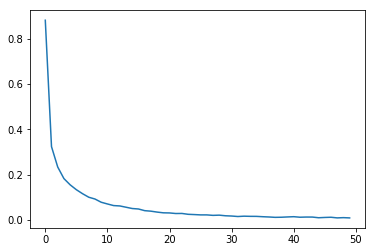

In [25]:
plt.plot(history.history['loss'])
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 89us/step


In [28]:
test_acc

0.9805